# SIMPLE LINEAR REGRESSION 

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)   # Visualization library lerden alınacak grafiklerin hepsinin aynı boyutta olması için

import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


* target variable : sales
* features variable : TV, radio, newspaper
* observations: rows, satırlar, herbir satır bir gözlemdir.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.sample(5)                       # random olarak 5 gözlem satırı getiriyor

,TV,radio,newspaper,sales
172,19.6,20.1,17.0,7.6
75,16.9,43.7,89.4,8.7
127,80.2,0.0,9.2,8.8
94,107.4,14.0,10.9,11.5
60,53.5,2.0,21.4,8.1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


* Standard sapma ne kadar dusukse data o kadar mean etrafinda toplanir
* mean ve %50(median) değerlerinin birbirinden çokta farklı olmaması iyi. 
* verinin dağılımı hakkında olumlu bilgi verir. mean ve median ın birbirinden uzak olması verinin dağılımının çarpık olabileceğini, birkaç tepeli dağılım olabileceğini gösterir
* standart sapma ne kadar küçükse veriler ortalama etrafında o kadar derli toplu demektir. standat sapma büyüdükçe ortalama etrafındaki dağılması genişler. 
* std sapma mean dan büyükse outlier lar vardır

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Feature sayısı artınca yukardaki tabloyu okumak zor olabilir, heatmap daha anlaşılır olabilir. 

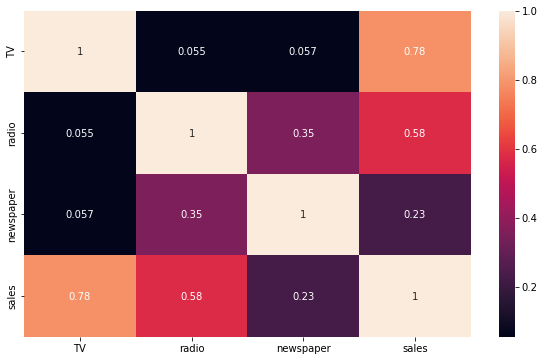

In [9]:
sns.heatmap(df.corr(), annot = True);

* sales bağımlı değişkenimiz yani target; tv, radio ve newspaper reklamları ise bağımsız değişkenler yani features.
* Korelasyon, iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir
* ilk değerlendirme olarak tv reklamları ve sales arasında pozitif yönlü güçlü bir ilişki olduğunu görebiliyoruz. tv reklamları arttıkça sales artışı olabileceğini söyleyebiliriz. radio reklamları ve sales arasındada pozitif yönlü orta şiddetli bir ilişki olduğu görülüyor. newspaper reklamları ve sales arasında ise pozitif yönlü düşük bir ilişki olduğu gözlemleniyor
* en anlamlı ve etki düzeyi yüksek değişkenin tv reklamları olduğu görülüyor
* burada ayrıca radio ve tv arasında yüksek bir corelasyon olmaması model kurma sırasında radio değişkeninide kullanabileğimizi anlayabiliyoruz. tv ve radio arasında güçlü bir ilişki olmuş olsa y bağımlı değişkene olan etkilerinin birbirlerinden etkilendiklerini bu nedenle de modelde ikisinin birlikte kullanılmaması gerektiği yorumu çıkabilir. ilişkinin şideddtinin güçlü olmaması nedeniyle sales deki farkli bir varyasyonu radio reklamlarının açıklayabiliyor olabileceğini değerlendirebiliyoruz.
*
* feature value ile target value arasinda yuksuk korelasyon olmasi iyi birşeydir. Features lar arasinda cok yuksek korelasyon olmasi ise problemdir , multicolinerity (buradaki notu düzenleyelim)

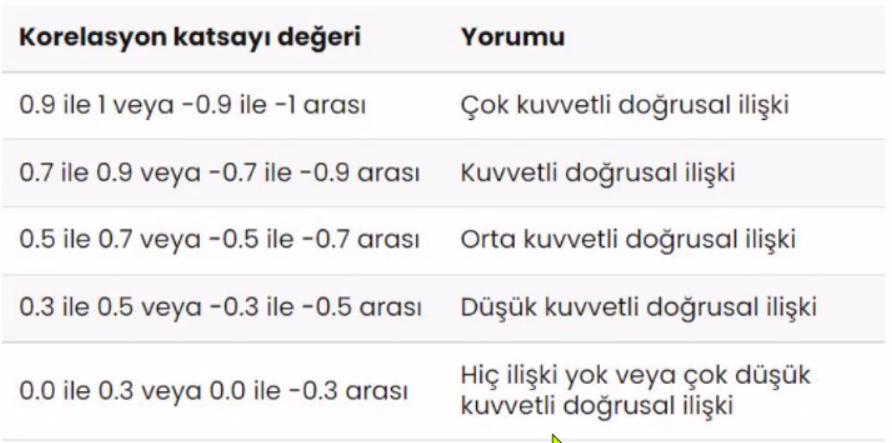

## create new independent variable (feature engineer)

In [10]:
# TV, radio ve newspaper değerlerinin toplamıyla total_spend sütunu oluşturalım

In [11]:
df["total_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [12]:
df = df.iloc[:, [0,1,2,4,3]]            # target variable ı yani sales i son sütunda görebilmek için sütunların yerini değiştik
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


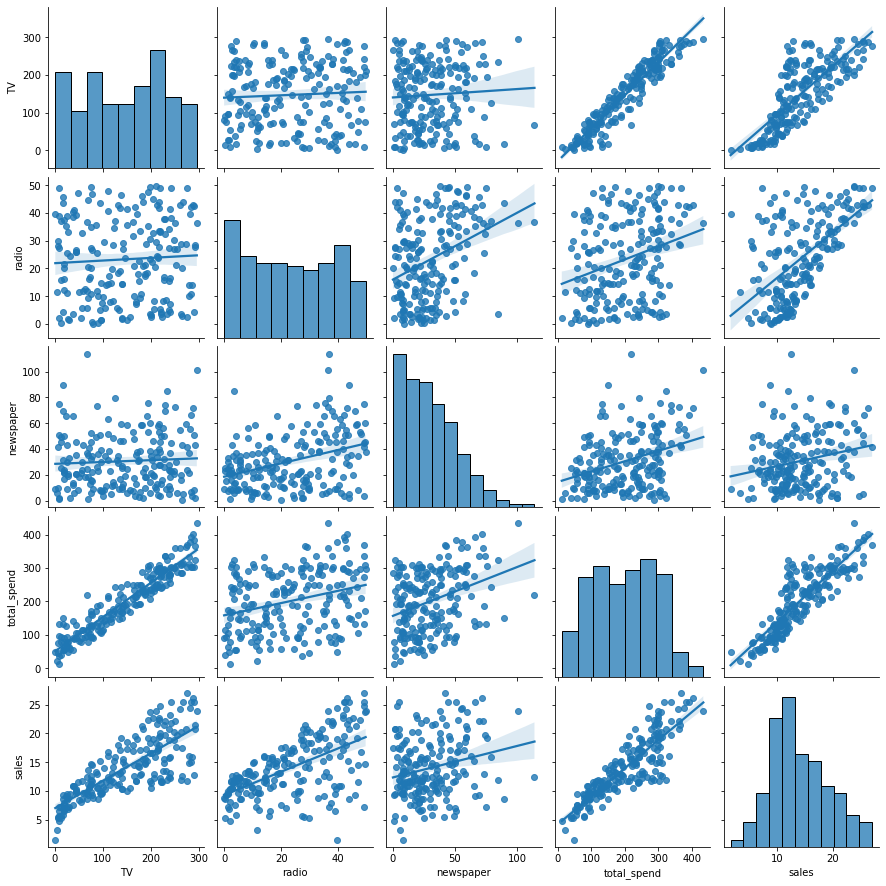

In [13]:
sns.pairplot(df, kind = "reg");

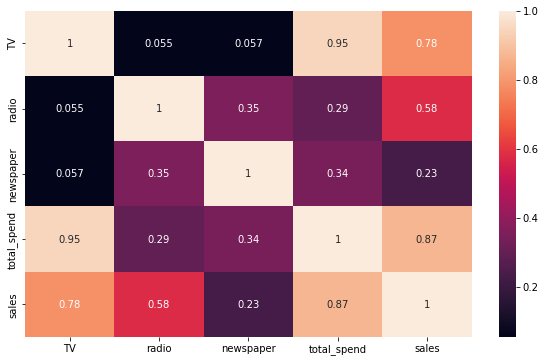

In [14]:
sns.heatmap(df.corr(), annot = True);

In [15]:
# sales' in features ler ile korelasyonları görüyoruz
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i]).round(4)}")  # {i:<12} : öncesindeki boşluğu ayarlıyor

corr between sales and TV          : 0.7822
corr between sales and radio       : 0.5762
corr between sales and newspaper   : 0.2283
corr between sales and total_spend : 0.8677


* yeni oluşturulan fetaure olarak total_spend ile target variable olan sales arasında 0.87 korelasyon var.

In [16]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


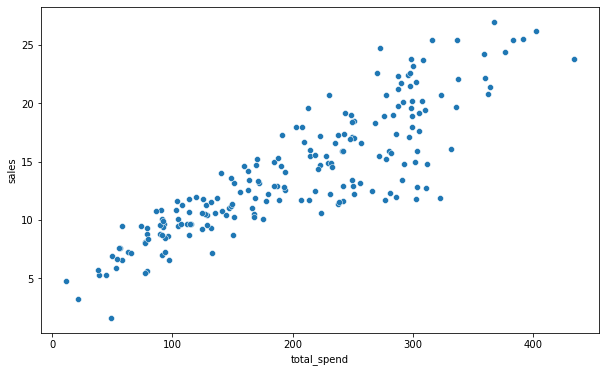

In [17]:
sns.scatterplot( x = "total_spend", y = "sales", data = df);

## Correlation between independent variable and dependent variable

In [18]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017422

# Cofficant of determination (R2)

In [19]:
R2_score = corr**2
R2_score

0.7529246402599598

* R2_score : bağımsız değişkenin bağımlı değişkeni açıklama gücü
* total spend , sales in % 75 ini açıklıyor
* R-squared: çıktının en önemli yanlarından biridir. bağımsız değişkenin bağımlı değişkendeki değişkenliği açıklama başarısıdır. Elimizdeki TV değişkeni sales değişkeninde yer alan değişkenliğin yaklaşık %75 ını açıklayabilmektedir.

## R2_score = 3000 / (60000-50000)

## R2_score = 0.3

## Linear Regression 

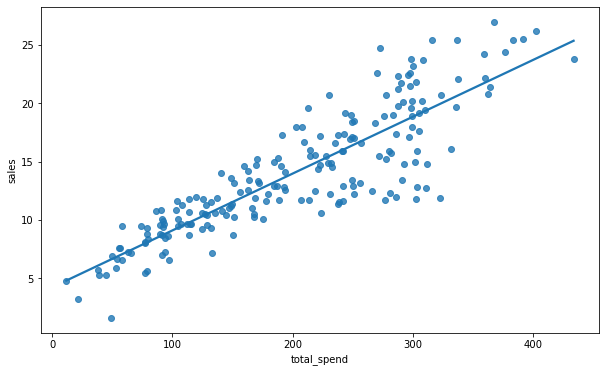

In [20]:
sns.regplot(x="total_spend", y = "sales", data = df, ci = None);

* En küçük kareler yöntemi - best line altı ve üstünde kalan değerlerin toplamı 0 olur ve best line’ı verir

## Spliting the dataset into X (independent variable) and y (dependent variable)

Independent variables = X

Dependent variables   = y

y = b1 * X + b0

y = bağımlı değişken = target variable = dependent variable

b1 = katsayı/eğim, slope 0 < b1 < 1 and -1 < b1 < 0

X = bağımsız değişken /feature, independent variable

b0 = intercept /otonom parametre / başlangıç parametresi -∞ < 0 < +∞

In [21]:
X = df["total_spend"]
y = df["sales"]

In [22]:
np.polyfit(X, y, deg =1)

array([0.04868788, 4.24302822])

* deg = 1, polinomun derecesini (yani 1. derece bir polinom oldugunu) gösteriyor. Kisaca lineer fit.
* b1 = 0.048  b0 = 4.24 verir

## Determination of coofficients (slopes, intercept)

In [23]:
slope, intercept = np.polyfit(X, y, deg =1)     # burada X' e slope, y' ye intercept atanıyor

In [24]:
print("slope     :", slope)
print("intercept :", intercept)

slope     : 0.04868787931904819
intercept : 4.2430282160363255


In [25]:
b1, b0 = np.polyfit(X, y, deg=1)

In [26]:
y_pred = b1 * X + b0

In [27]:
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

In [28]:
values = {"actual": y, "predicted":y_pred, "resudial": y - y_pred, "LSE" : (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,resudial,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


* actual : gerçek y değerleri
* predicted : tahmin y değerleri
* resudial : (y - y_pred) hata
* LSE : en küçük karaler hatası

In [29]:
df_2.resudial.sum().round()

-0.0

In [30]:
df_2.LSE.sum()

1338.4439761715594

noktalarin cizgiye olan uzakliklarinin kareleri toplamini cikan sonuc 1338 den daha kucuk yapmak mumkun degil. Olabilecek minumum deger 1338

## Prediction with simple linear regression

* 0-500 arası 100 tane reklam miktarı üretip modelin bu değerler için tahmin edilen satış değerleri nelerdir
* prediction modelimizi deniyoruz burada. öncelikle X değerleri üretiyoruz potantial_spend olarak.
* sonrasındada y_tahmin değeri olarak predicted_sales_lin buluyoruz

In [31]:
potential_spend = np.linspace(0, 500, 100) # potansiyel harcama
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [32]:
predicted_sales_lin = b1 * potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

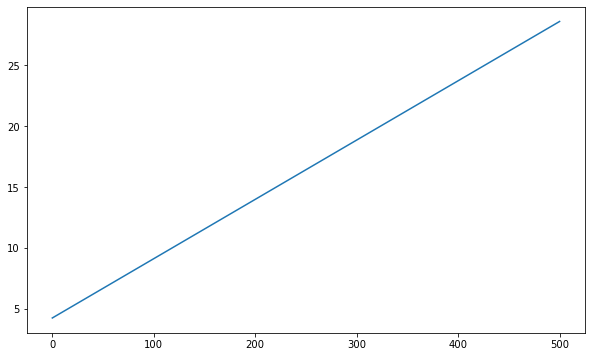

In [33]:
plt.plot(potential_spend, predicted_sales_lin);

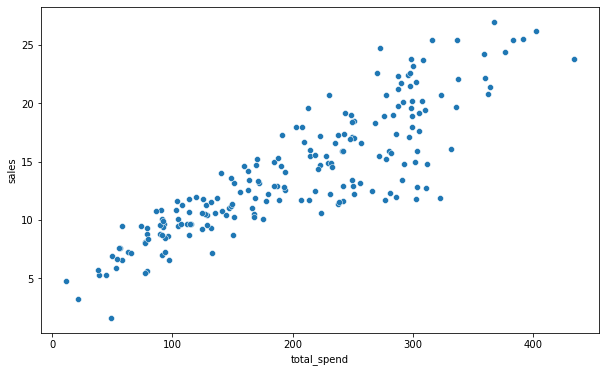

In [34]:
sns.scatterplot(x = "total_spend", y = "sales", data = df);

In [35]:
# potentiel_spend = 1000000 için predicted_sales_lin hesaplayalım

predicted_sales_lin = b1 * 1000000 + b0
predicted_sales_lin

48692.12234726422